## Javier Al Faiza - PYTN-KS20-013

 
```
Assignment 3 Hacktivate Data Science Python
```

## Tentang Data

data ini merupakan kampanye marketing dari Institusi Bank Portugis berdasarkan dari panggilan telepon. 
Seringkali, diperlukan lebih dari satu kontak ke nasabah yang sama, untuk mengakses apakah produk (deposito berjangka bank) akan berlangganan ('yes') atau tidak ('no'). 

Dataset ini terdiri dari 4 :

* **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date
(from May 2008 to November 2010), very close to the data analyzed in [Moro et al.,
2014]
* **bank-additional.csv** with 10% of the examples (4119), randomly selected from 1),
and 20 inputs.
* **bank-full.csv** with all examples and 17 inputs, ordered by date (older version of
this dataset with less inputs).
* **bank.csv** with 10% of the examples and 17 inputs, randomly selected from 3 (older
version of this dataset with less inputs).

Dataset terkecil disediakan untuk menguji mesin yang lebih menuntut komputasi
algoritme pembelajaran yang lebih berat (misalnya, SVM).

Tujuan klasifikasi ini  adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) pada deposito berjangka (variabel y).

**Data Klien Bank:**

1. age : usia (numerik)
2. job : jenis pekerjaan (kategorikal: 'admin','kerah biru','pengusaha','pembantu rumah tangga','manajemen','pensiunan','wiraswasta','jasa','pelajar','teknisi','pengangguran','tidak diketahui')
3. marital: status perkawinan (kategorikal: 'cerai','menikah','lajang','tidak diketahui'; catatan: 'cerai' berarti bercerai atau janda)
4. education: pendidikan (kategorisasi: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: apakah memiliki kredit macet? (kategorikal: 'tidak', 'ya', 'tidak diketahui')
6. housing: memiliki kredit perumahan? (kategorikal: 'tidak', 'ya', 'tidak diketahui')
7. Loan: memiliki pinjaman pribadi? (kategorikal: 'tidak', 'ya', 'tidak diketahui')

**Terkait dengan Kontak Terakhir dari Kampanye Saat Ini:**

8. contact: jenis komunikasi kontak (kategorikal: 'seluler', 'telepon')
9. month: bulan kontak terakhir dalam setahun (kategorikal: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: hari kontak terakhir dalam seminggu (kategorikal: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika durasi=0 maka y='tidak'). 
Namun, durasi tidak diketahui sebelum panggilan dilakukan. Selain itu, setelah pemanggilan selesai, y baru diketahui dengan jelas. Dengan demikian, input ini hanya boleh disertakan untuk tujuan tolok ukur dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

**Atribut Lainnya:**

12. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
13. pdays: jumlah hari yang telah berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya (angka; 999 berarti klien tidak dihubungi sebelumnya)
14. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (angka)
15. poutcome: hasil dari kampanye pemasaran sebelumnya (kategorikal: 'gagal', 'tidak ada', 'sukses')

**Aribut Konteks Sosial dan Ekonomi**

16. emp.var.rate: tingkat variasi ketenagakerjaan. indikator triwulanan (numerik)
17. cons.price.idx: indeks harga konsumen. indikator bulanan (numerik)
18. cons.conf.idx: indeks kepercayaan konsumen. indikator bulanan (numerik)
19. euribor3m: suku bunga euribor 3 bulan. indikator harian (numerik)
20. nr.employed: jumlah karyawan. indikator kuartalan (numerik)

**Variabel Output (target yang diinginkan):**

21. y. apakah klien berlangganan deposito berjangka? (biner: 'ya', 'tidak')

**Dataset Link** : https://archive.ics.uci.edu/dataset/222/bank+marketing

## Import Library yang Dibutuhkan 

In [2]:
# Import library yang dibutuhkan
# Data cleaning and manipulation 
import pandas as pd
import numpy as np

# data visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# data exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.feature_selection import SelectKBest, chi2

# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from six import StringIO
from IPython.display import Image
import sklearn.tree as DecisionTreeClassifier
import pydotplus
from sklearn import tree
from imblearn.over_sampling import SMOTE

# ignore warning
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset 

In [19]:
# Membaca dataset dengan library pandas
bank = pd.read_csv("./dataset/bank-additional-full.csv", delimiter=';')

# Menampilkan data teratas dan tail
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
# Melihat jumlah baris dan kolom pada dataset
bank.shape

(41188, 21)

In [21]:
# Cara lain untuk melihat baris dan kolom
print("Baris : ", bank.shape[0])
print("Kolom : ", bank.shape[1])

Baris :  41188
Kolom :  21


## Data Cleansing and Preparation

In [22]:
# Menampilkan 5 data teratas
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
# Menghitung korelasi antara dua set data numerik
bank.corr(numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


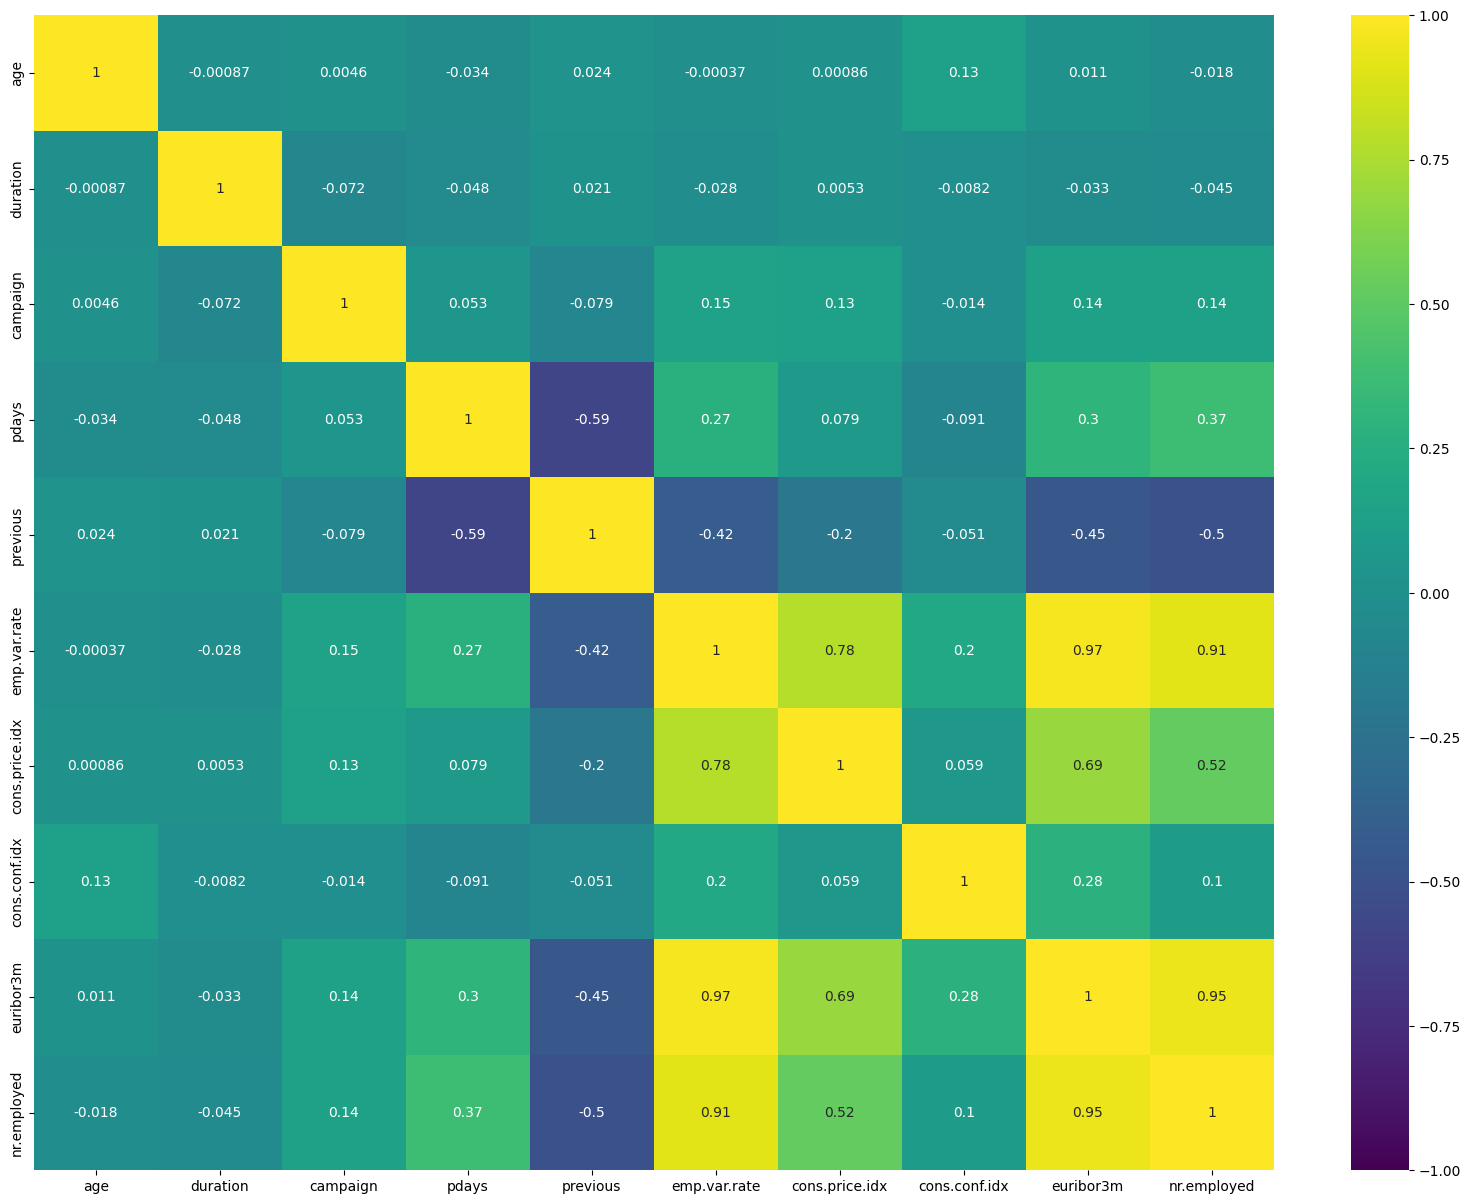

In [24]:
# Memvisualisasikan matriks korelasi antara kolom-kolom dalam DataFrame bank dengan menggunakan Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(data=bank.corr(numeric_only=True), vmin=-1, annot=True, cmap='viridis')
plt.show()

Target = Y

Seperti pada penjelasan di Data Understanding bahwa `durasi` merupakan data numerik dan nilainya tidak diperoleh sebelum panggilan dilakukan. Sehingga data ini tidak boleh diikutsertakan di dalam model prediksi (dihapus). `Campaign dan cons.conf.idx` juga akan dihapus karena nilai korelasinya rendah terhadap kolom target. Namun untuk kolom `age` tidak dihapus karena dapat mewakili kondisi sebenarnya dan juga dapat menambah wawasan. 

In [25]:
# Menghapus kolom 'duration', 'campaign', 'cons.conf.idx', 'pdays' dari dataset
bank.drop(['duration', 'campaign', 'cons.conf.idx', 'pdays'], axis=1, inplace=True)

In [26]:
# Menghitung nilai unik pada setiap kolom
bank.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

In [27]:
# Mendapatkan daftar kolom dalam dataset
dataset_kolom = bank.columns

# Loop melalui setiap kolom
for kolom in dataset_kolom:
    # Menampilkan nilai unik dalam kolom, diurutkan
    unique_val = bank[kolom].sort_values().unique()
    print(f"Column: {kolom}")
    print(unique_val)
    print("\n")

Column: age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]


Column: job
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


Column: marital
['divorced' 'married' 'single' 'unknown']


Column: education
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']


Column: default
['no' 'unknown' 'yes']


Column: housing
['no' 'unknown' 'yes']


Column: loan
['no' 'unknown' 'yes']


Column: contact
['cellular' 'telephone']


Column: month
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


Column: day_of_week
['fri' 'mon' 'thu' 'tue' 'wed']


Column: previous
[0 1 2 3 4 5 6 7]


Column: poutcome
['failure' 'nonexistent' 'success']


Co

Dapat dilihat dari beberapa isi kolom di atas terdapat nilai 'unknown'

In [28]:
# Menghitung jumlah data 'unknown' dalam setiap kolom
unknown_counts = bank.eq('unknown').sum()

# Menampilkan hasil perhitungan
print(unknown_counts)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [29]:
# Mengubah nilai 'unknown' menjadi nilai nan
bank.replace('unknown', np.nan, inplace=True)

In [30]:
# Memeriksa jumlah missing value pada dataset
bank.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [31]:
# Menampilkan persentase dari missing value
bank.isna().sum() /len(bank) *100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

Text(0.5, 1.0, 'Distribusi Data Null')

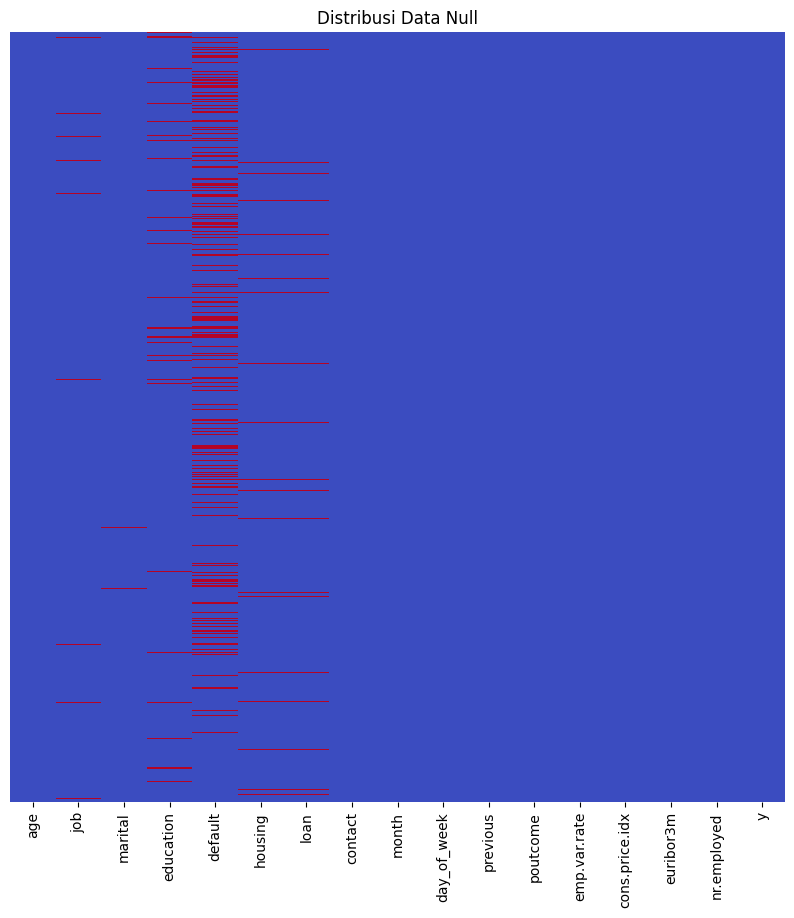

In [32]:
# Memeriksa korelasi Null dengan menggunakan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(bank.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')
plt.title('Distribusi Data Null')

Dapat kita lihat terdapat Nan pada kolom job, martial, education, default, housing, dan loan.

In [33]:
# Menghapus baris dengan nilai NaN dari dataset
bank = bank.dropna()

In [34]:
# Memeriksa jumlah missing value pada dataset yang sudah dibersihkan
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Text(0.5, 1.0, 'Distribusi Data Null')

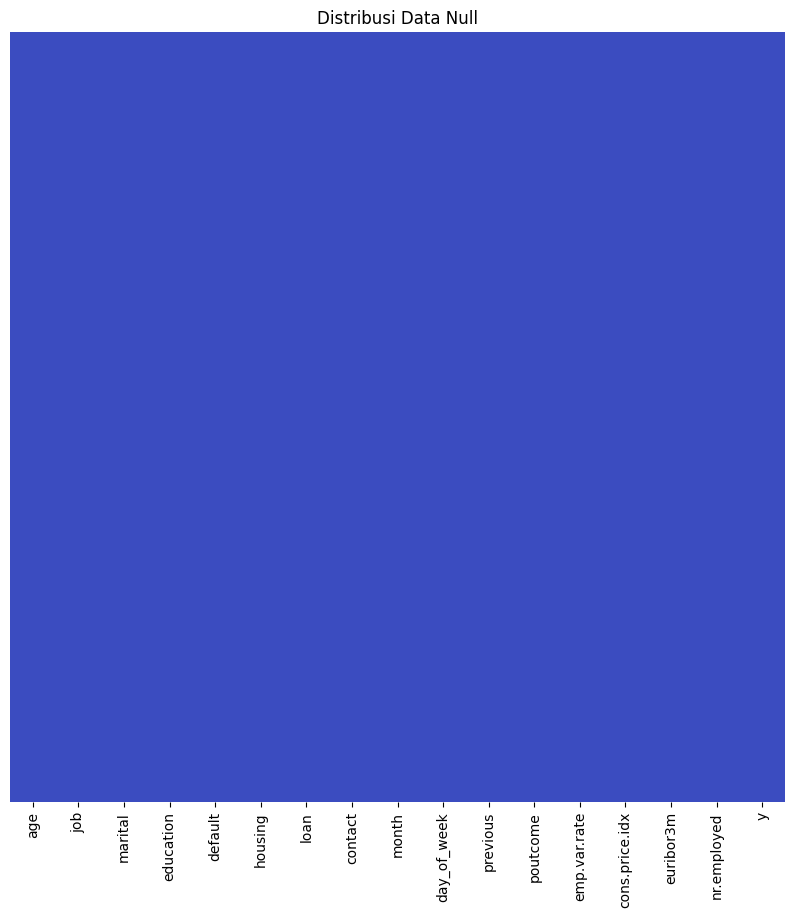

In [35]:
# Memeriksa korelasi Null yang sudah dubersihkan dengan menggunakan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(bank.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')
plt.title('Distribusi Data Null')

Dapat dilihat sudah tidak terdapat nilai Nan.

In [36]:
# Menampilkan duplikasi data
bank.duplicated().sum()

3297

In [37]:
# Menghapus duplikasi data
bank = bank.drop_duplicates()
bank.duplicated().sum()

0

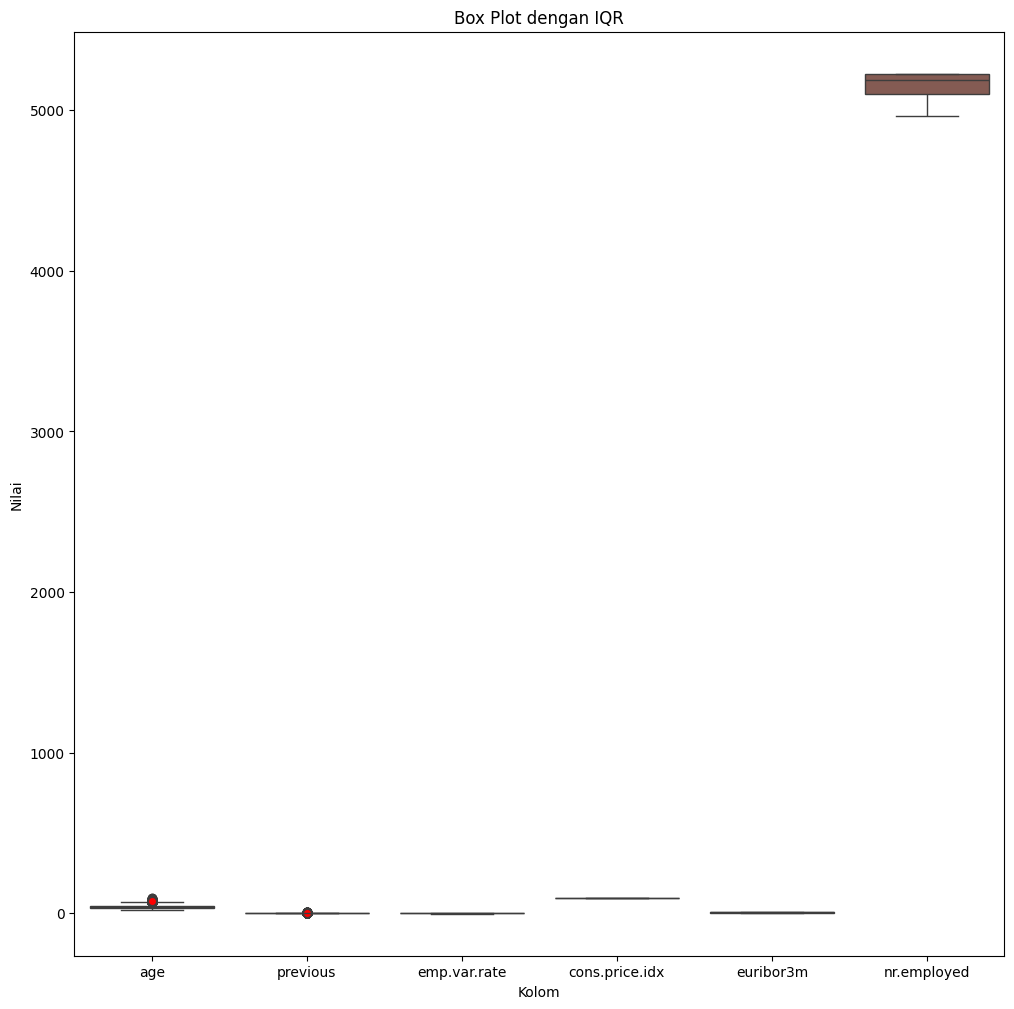

In [38]:
# Menggunakan metode IQR untuk mengidentifikasi outlier pada setiap kolom
# Mengatur ukuran gambar
plt.figure(figsize=(12, 12))
# Membuat box plot untuk setiap kolom menggunakan IQR
sns.boxplot(data=bank, showfliers=True, flierprops={'markerfacecolor': 'red', 'marker': 'o'})
# Menambahkan label pada plot
plt.title("Box Plot dengan IQR")
plt.xlabel("Kolom")
plt.ylabel("Nilai")
# Menampilkan plot
plt.show()

Dapat dilihat dari gambar di atas terdapat outlier dibeberapa kolom diantaranya adalah `age dan previous`. Outlier tetap dipertahankan karena outlier pada data mungkin mewakili situasi yang valid atau fenomena yang sebenarnya. Outlier juga mengindikasikan situasi atau kondisi yang tidak biasa atau menarik untuk dipelajari lebih lanjut.

## Exploratory Data Analysis (EDA)

In [39]:
# Menampilkan 5 data teratas
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no


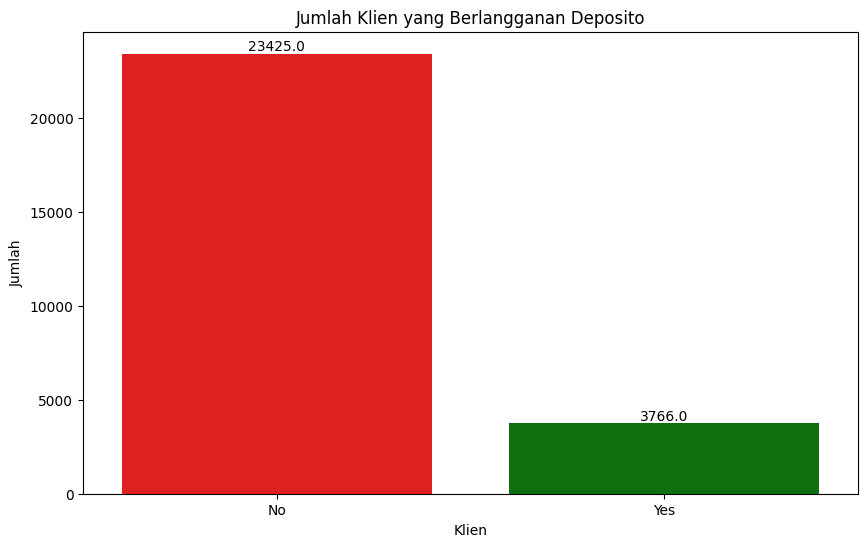

In [40]:
# Menampilkan jumlah klien yang berlangganan deposito

# Mengatur palet warna kustom
custom_palette = ["red", "green"]

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=bank, x='y', palette=custom_palette)

# Menambahkan jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xticks(ticks=range(2), labels=['No', 'Yes'])
plt.xlabel('Klien')
plt.ylabel('Jumlah')
plt.title('Jumlah Klien yang Berlangganan Deposito')
plt.show()

Dari gambar di atas menampilkan jumlah klien yang berlangganan deposito dan tidak dari dataset. Diketahui ada 3766 klien yang berlangganan deposito dan ada 23425 klien yang tidak berlangganan.

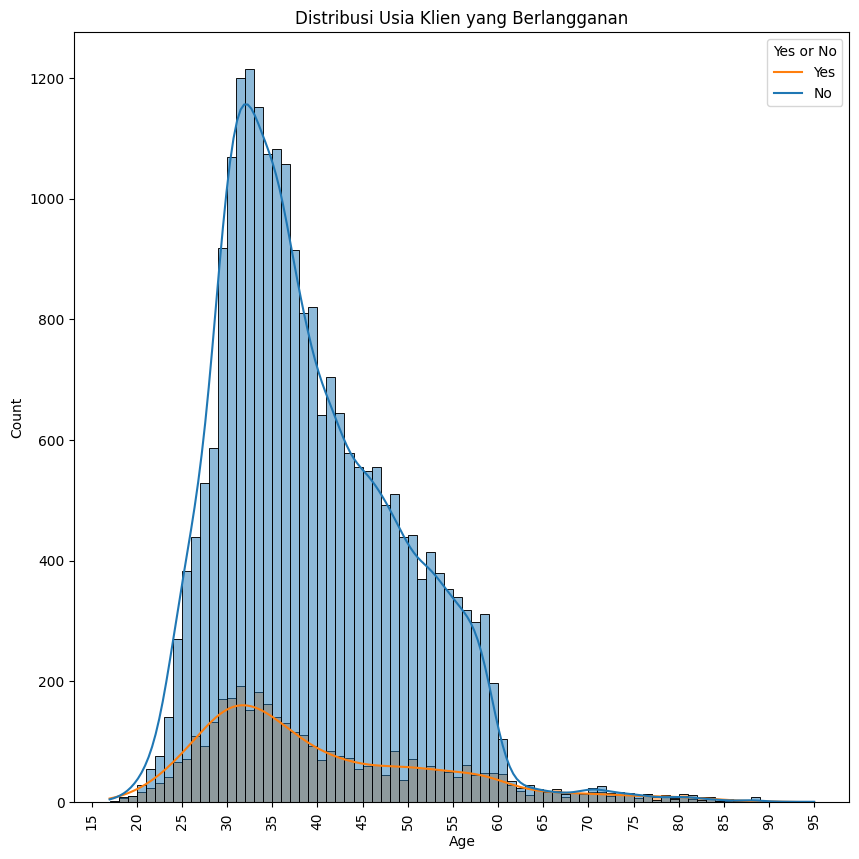

In [41]:
# Menampilkan Distribusi Data Klien yang Berlangganan 
plt.figure(figsize=(10, 10))
sns.histplot(data=bank, x='age', hue='y', kde=True, bins=78)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribusi Usia Klien yang Berlangganan')
plt.xticks(rotation=90, ticks=range(15, 100, 5))
plt.legend(title='Yes or No', labels=['Yes', 'No'], loc='upper right')
plt.show()

Dapat dilihat pada gambar di atas merupakan distribusi usia klien yang berlangganan. Dapat diketahui bahwa `kebanyakan usia klien bank sekitar 30-35 tahun` baik yang berlangganan deposito ataupun tidak berlangganan.

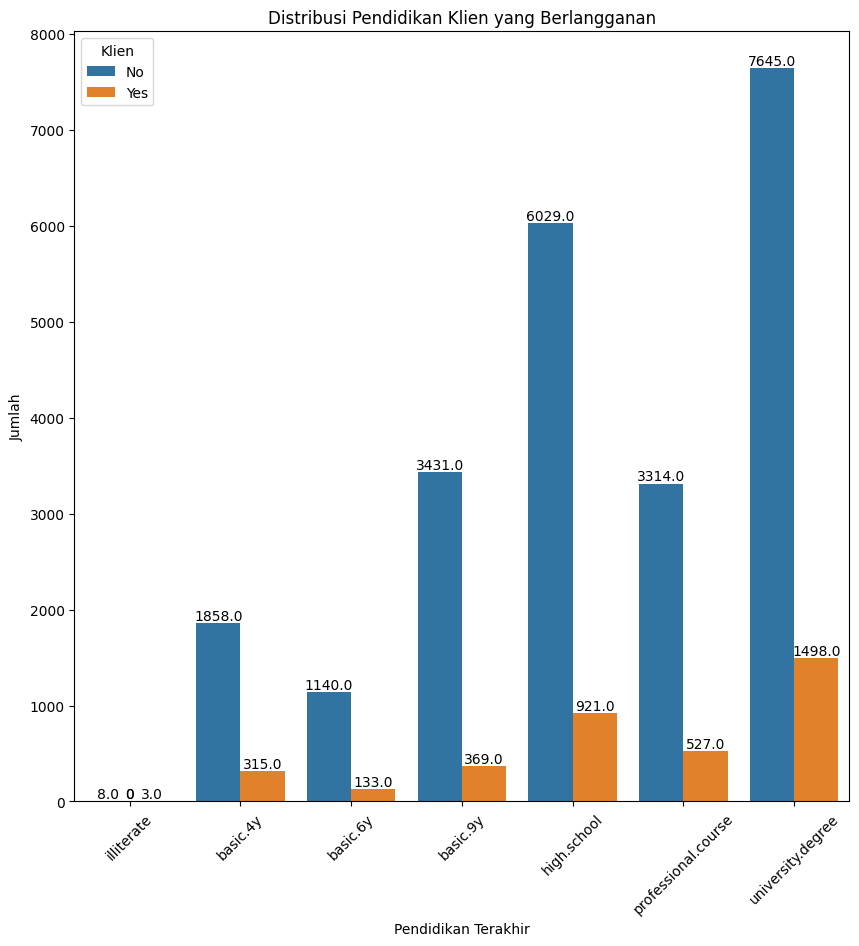

In [42]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=bank, x='education', hue='y', order=['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree'])

# Menambahkan jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Pendidikan Terakhir')
plt.ylabel('Jumlah')
plt.title('Distribusi Pendidikan Klien yang Berlangganan')
plt.xticks(rotation=45)
plt.legend(title='Klien', labels=['No', 'Yes'], loc='upper left')
plt.show()

Dapat dilihat dari gambar di atas merupakan distribusi pendidikan klien yang berlangganan. Adapun urutan klien yang berlangganan dari mulai yang terbesar hingga yang terkecil, sebagai berikut :
1. Sarjana (Universitas) = 1498 orang
2. SMA (High School) = 921 orang
3. Pelatihan Profesinal = 527 orang
4. SMP = 369 orang
5. Kelas 4 SD = 315 orang
6.  SD = 133 orang
7. Buta huruf = 3 orang

## Preprocessing

In [43]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no


In [44]:
# Mendapatkan daftar kolom dalam dataset
dataset_kolom = bank.columns

# Loop melalui setiap kolom
for kolom in dataset_kolom:
    # Menampilkan nilai unik dalam kolom, diurutkan
    unique_val = bank[kolom].sort_values().unique()
    print(f"Column: {kolom}")
    print(unique_val)
    print("\n")

Column: age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 94 95]


Column: job
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']


Column: marital
['divorced' 'married' 'single']


Column: education
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree']


Column: default
['no' 'yes']


Column: housing
['no' 'yes']


Column: loan
['no' 'yes']


Column: contact
['cellular' 'telephone']


Column: month
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


Column: day_of_week
['fri' 'mon' 'thu' 'tue' 'wed']


Column: previous
[0 1 2 3 4 5 6 7]


Column: poutcome
['failure' 'nonexistent' 'success']


Column: emp.var.rate
[-3.4 -3.  -2.9 -1.8 -1.7 -1.1 -0.2 -0.1  1.1  

In [45]:
# Melihat informasi tipe data
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27191 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             27191 non-null  int64  
 1   job             27191 non-null  object 
 2   marital         27191 non-null  object 
 3   education       27191 non-null  object 
 4   default         27191 non-null  object 
 5   housing         27191 non-null  object 
 6   loan            27191 non-null  object 
 7   contact         27191 non-null  object 
 8   month           27191 non-null  object 
 9   day_of_week     27191 non-null  object 
 10  previous        27191 non-null  int64  
 11  poutcome        27191 non-null  object 
 12  emp.var.rate    27191 non-null  float64
 13  cons.price.idx  27191 non-null  float64
 14  euribor3m       27191 non-null  float64
 15  nr.employed     27191 non-null  float64
 16  y               27191 non-null  object 
dtypes: float64(4), int64(2), object(11)


In [46]:
# Menentukan kolom-kolom yang akan dilakukan label encoding
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Melakukan label encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    bank[col] = label_encoder.fit_transform(bank[col])

# Menampilkan hasil
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,0,1,1.1,93.994,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,0,1,1.1,93.994,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,0,1,1.1,93.994,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,0,1,1.1,93.994,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,0,1,1.1,93.994,4.857,5191.0,0


In [47]:
# Memisahkan fitur dan target
X = bank.drop('y', axis=1)
Y = bank['y']

In [48]:
# Split data menjadi data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
# Menampilkan data trainng
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
24435,42,9,1,5,0,1,1,1,7,1,0,1,-0.1,93.200,4.191,5195.8
34216,35,0,2,6,0,0,0,0,6,4,0,1,-1.8,92.893,1.281,5099.1
9750,54,4,1,6,0,0,0,1,4,1,0,1,1.4,94.465,4.961,5228.1
31635,29,7,1,5,0,0,0,0,6,2,0,1,-1.8,92.893,1.327,5099.1
2096,39,10,1,6,0,1,0,1,6,1,0,1,1.1,93.994,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34459,42,7,0,3,0,0,0,0,6,2,0,1,-1.8,92.893,1.266,5099.1
9292,32,0,2,3,0,0,1,1,4,0,0,1,1.4,94.465,4.967,5228.1
1523,35,9,2,5,0,1,0,1,6,2,0,1,1.1,93.994,4.855,5191.0
26376,32,0,1,5,0,1,0,0,7,2,0,1,-0.1,93.200,4.076,5195.8


In [50]:
# Menampilkan data testing
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
20403,35,7,1,3,0,1,0,0,1,3,0,1,1.4,93.444,4.966,5228.1
37039,27,0,2,6,0,0,0,0,3,3,0,1,-2.9,92.469,1.044,5076.2
27133,43,4,2,3,0,1,0,0,7,0,0,1,-0.1,93.200,4.021,5195.8
25112,45,6,1,0,0,1,0,0,7,3,0,1,-0.1,93.200,4.153,5195.8
35128,34,0,2,3,0,1,0,0,6,0,1,0,-1.8,92.893,1.250,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32359,45,9,1,2,0,0,0,0,6,0,0,1,-1.8,92.893,1.313,5099.1
40198,56,9,1,5,0,0,0,0,3,1,1,0,-1.7,94.215,0.870,4991.6
998,57,9,1,2,0,1,0,1,6,4,0,1,1.1,93.994,4.856,5191.0
38687,56,9,0,6,0,0,0,0,7,0,1,2,-3.4,92.649,0.716,5017.5


In [51]:
# Menampilkan data training target
Y_train

24435    0
34216    0
9750     0
31635    0
2096     0
        ..
34459    0
9292     0
1523     0
26376    0
37077    0
Name: y, Length: 21752, dtype: int32

In [52]:
# Penanganan Ketidakseimbangan Kelas
from collections import Counter
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print('Original dataset shape is ', Counter(Y_train))
print('Resample dataset shape is ', Counter(Y_train_resampled))

Original dataset shape is  Counter({0: 18728, 1: 3024})
Resample dataset shape is  Counter({0: 18728, 1: 18728})


In [53]:
pd.DataFrame(X_train_resampled)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,42,9,1,5,0,1,1,1,7,1,0,1,-0.1,93.200000,4.191000,5195.8
1,35,0,2,6,0,0,0,0,6,4,0,1,-1.8,92.893000,1.281000,5099.1
2,54,4,1,6,0,0,0,1,4,1,0,1,1.4,94.465000,4.961000,5228.1
3,29,7,1,5,0,0,0,0,6,2,0,1,-1.8,92.893000,1.327000,5099.1
4,39,10,1,6,0,1,0,1,6,1,0,1,1.1,93.994000,4.857000,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37451,41,7,1,3,0,0,0,1,6,0,0,1,1.1,93.994000,4.862697,5191.0
37452,78,5,1,0,0,0,0,0,3,1,0,1,-1.7,94.215000,0.870000,4991.6
37453,31,7,1,3,0,1,0,0,6,3,0,0,-1.8,92.893000,1.328894,5099.1
37454,33,9,0,6,0,1,0,0,4,2,0,1,-2.9,92.963000,1.261433,5076.2


In [54]:
# Normalisasi atau Penskalaan Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Pemilihan Fitur
selector = SelectKBest(score_func=chi2, k=11)  # Memilih 10 fitur terbaik
X_train_selected = selector.fit_transform(X_train_scaled, Y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

### Modelling dan Confusion Matrix


#### **Logistic Regression**

Code Review : Mengimplementasikan Logistic Regression Dengan Scikit-Learn.

Analysis : Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model.

In [56]:
# Inisialisasi model
logR_model = LogisticRegression()

# Melatih dan mengevaluasi Logistic Regression
logR_model.fit(X_train_selected, Y_train_resampled)
logR_pred = logR_model.predict(X_test_selected)
print("Model: Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, logR_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, logR_pred))


Model: Logistic Regression
Confusion Matrix:
[[3740  957]
 [ 305  437]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      4697
           1       0.31      0.59      0.41       742

    accuracy                           0.77      5439
   macro avg       0.62      0.69      0.63      5439
weighted avg       0.84      0.77      0.79      5439



#### **K-Nearest Neighbors**

Code Review : Mengimplementasikan K-Nearest Neighbors Dengan Scikit-Learn.

Analysis : Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model.

In [57]:
# Inisialisasi model
knn_model = KNeighborsClassifier()

# Melatih dan mengevaluasi K-Nearest Neighbors (KNN)
knn_model.fit(X_train_selected, Y_train_resampled)
knn_pred = knn_model.predict(X_test_selected)
print("Model: K-Nearest Neighbors (KNN)")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, knn_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, knn_pred))

Model: K-Nearest Neighbors (KNN)
Confusion Matrix:
[[4293  404]
 [ 404  338]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4697
           1       0.46      0.46      0.46       742

    accuracy                           0.85      5439
   macro avg       0.68      0.68      0.68      5439
weighted avg       0.85      0.85      0.85      5439



#### **Support Vector Machine**

Code Review : Mengimplementasikan Support Vector Machine Dengan Scikit-Learn.

Analysis : Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model.


In [58]:
# Inisialisasi model
svm_model = SVC()

# Melatih dan mengevaluasi Support Vector Machine (SVM)
svm_model.fit(X_train_selected, Y_train_resampled)
svm_pred = svm_model.predict(X_test_selected)
print("Model: Support Vector Machine (SVM)")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, svm_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, svm_pred))

Model: Support Vector Machine (SVM)
Confusion Matrix:
[[3824  873]
 [ 304  438]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4697
           1       0.33      0.59      0.43       742

    accuracy                           0.78      5439
   macro avg       0.63      0.70      0.65      5439
weighted avg       0.85      0.78      0.81      5439



#### **Decision Tree**

Code Review : Mengimplementasikan Decision Tree Dengan Scikit-Learn.

Analysis : Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model.

In [59]:
# Inisialisasi model
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# Melatih dan mengevaluasi Decision Tree
tree_model.fit(X_train_selected, Y_train_resampled)
tree_pred = tree_model.predict(X_test_selected)
print("Model: Decision Tree")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, tree_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, tree_pred))

Model: Decision Tree
Confusion Matrix:
[[4375  322]
 [ 484  258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4697
           1       0.44      0.35      0.39       742

    accuracy                           0.85      5439
   macro avg       0.67      0.64      0.65      5439
weighted avg       0.84      0.85      0.84      5439



#### **Random Forest**

Code Review : Mengimplementasikan Random Forest Dengan Scikit-Learn.

Analysis : Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model.

In [60]:
# Inisialisasi model
rForest_model = RandomForestClassifier()

# Melatih dan mengevaluasi Random Forest
rForest_model.fit(X_train_selected, Y_train_resampled)
rForest_pred = rForest_model.predict(X_test_selected)
print("Model: Random Forest")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, rForest_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, rForest_pred))

Model: Random Forest
Confusion Matrix:
[[4339  358]
 [ 455  287]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4697
           1       0.44      0.39      0.41       742

    accuracy                           0.85      5439
   macro avg       0.68      0.66      0.66      5439
weighted avg       0.84      0.85      0.85      5439



#### **Naive Bayes**

Code Review : Mengimplementasikan Naive Bayes Dengan Scikit-Learn.

Analysis : Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model.

In [61]:
# Inisialisasi model
naive_model = GaussianNB()

# Melatih dan mengevaluasi Naive Bayes
naive_model.fit(X_train_selected, Y_train_resampled)
naive_pred = naive_model.predict(X_test_selected)
print("Model: Naive Bayes")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, naive_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, naive_pred))

Model: Naive Bayes
Confusion Matrix:
[[3478 1219]
 [ 275  467]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      4697
           1       0.28      0.63      0.38       742

    accuracy                           0.73      5439
   macro avg       0.60      0.68      0.60      5439
weighted avg       0.84      0.73      0.76      5439



In [62]:
from sklearn.metrics import classification_report

# Inisialisasi model
models = {
    "Logistic Regression": logR_pred,
    "K-Nearest Neighbors (KNN)": knn_pred,
    "Support Vector Machine (SVM)": svm_pred,
    "Decision Tree": tree_pred,
    "Random Forest": rForest_pred,
    "Naive Bayes": naive_pred
}

results = []

# Loop melalui model
for model_name, predictions in models.items():
    # Menghitung confusion matrix
    cm = confusion_matrix(Y_test, predictions)
    
    # Menghitung classification report
    report = classification_report(Y_test, predictions, output_dict=True)
    
    # Mengambil metrik yang dibutuhkan
    metrics_0 = report['0']
    metrics_1 = report['1']
    
    # Menyimpan hasil
    results.append({
        "Model": model_name,
        "Confusion Matrix": cm,
        "Precision (0)": metrics_0['precision'],
        "Precision (1)": metrics_1['precision'],
        "Recall (0)": metrics_0['recall'],
        "Recall (1)": metrics_1['recall'],
        "F1-score (0)": metrics_0['f1-score'],
        "F1-score (1)": metrics_1['f1-score']
    })

# Membuat DataFrame
df_results = pd.DataFrame(results)

# Menampilkan DataFrame
df_results


,Model,Confusion Matrix,Precision (0),Precision (1),Recall (0),Recall (1),F1-score (0),F1-score (1)
0,Logistic Regression,"[[3740, 957], [305, 437]]",0.924598,0.313486,0.796253,0.588949,0.855639,0.409176
1,K-Nearest Neighbors (KNN),"[[4293, 404], [404, 338]]",0.913988,0.455526,0.913988,0.455526,0.913988,0.455526
2,Support Vector Machine (SVM),"[[3824, 873], [304, 438]]",0.926357,0.334096,0.814137,0.590296,0.866629,0.426693
3,Decision Tree,"[[4375, 322], [484, 258]]",0.900391,0.444828,0.931446,0.347709,0.915655,0.390318
4,Random Forest,"[[4339, 358], [455, 287]]",0.905090,0.444961,0.923781,0.386792,0.914340,0.413843
5,Naive Bayes,"[[3478, 1219], [275, 467]]",0.926725,0.276987,0.740473,0.629380,0.823195,0.384679


Berdasarkan hasil report di atas, dapat diketahui bahwa model `K-Nearest Neighbors (KNN) merupakan model yang terbaik` dengan mempertimbangkan hasil dari data klien yang berlanggaan(1). Model ini memiliki nilai Precision(1) yang paling tinggi, Recall(1) yang cukup tinggi, dan F1-score(1) yang paling tinggi untuk kelas yang relevan (dalam kasus ini, kelas 1 atau 'Yes') cenderung dianggap lebih baik. 


Berdasarkan F1-score, model K-Nearest Neighbors (KNN) memiliki nilai yang paling tinggi dengan nilai 0.455526, `menunjukkan performa yang baik dalam mengklasifikasikan pelanggan yang berlangganan`. Dan juga nilai precision dan recall untuk model ini juga relatif seimbang. Untuk mempertimbangkan konteks bisnis dan preferensi terkait trade-off antara precision dan recall. Jika keseimbangan antara precision dan recall lebih penting, maka model KNN dapat menjadi pilihan yang baik.
